<a href="https://colab.research.google.com/github/lifod/TSC/blob/main/4%EC%9B%94_24%EC%9D%BC_%EB%8B%A8%EC%88%9C%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#나눔바른고딕 폰트 설치 및 폰트 설정
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum > /dev/null

In [1]:
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)

import matplotlib.pyplot as plt
fm._rebuild()                                              #json 파일업데이트
plt.rcParams["font.family"]='NanumBarunGothic'             #나눔바른고딕체 설정

###  [1]데이터 불러오기 및 데이터 전처리[1]

In [2]:
import pandas as pd

df=pd.read_csv('/content/corona.csv',encoding='cp949')           #만약 header 가 없으면 header=None 설정

df.head()                                                      #데이터 확인    / df.tail() 

,stdDay,defCnt,deathCnt
0,2020년 12월 04일 00시,36332.0,536.0
1,2020년 12월 05일 00시,36915.0,NaN
2,2020년 12월 06일 00시,37546.0,545.0
3,2020년 12월 07일 00시,38161.0,549.0
4,2020년 12월 08일 00시,NaN,552.0


In [3]:
df.shape     #데이터의 행과 열 확인 (헤더는 포함되지 않음)

(60, 3)

In [4]:
df.info()    #데이터에 대한 정보 확인 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   stdDay    60 non-null     object 
 1   defCnt    59 non-null     float64
 2   deathCnt  59 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB


In [5]:
df.isnull().sum()   #결측값 확인

stdDay      0
defCnt      1
deathCnt    1
dtype: int64

In [6]:
df['defCnt']                                  

df[['defCnt','deathCnt']]

,defCnt,deathCnt
0,36332.0,536.0
1,36915.0,NaN
2,37546.0,545.0
3,38161.0,549.0
4,NaN,552.0
5,39432.0,556.0
6,40098.0,564.0
7,40786.0,572.0
8,41736.0,578.0
9,42766.0,580.0


In [7]:
df.iloc[3:10,[0,2]]

,stdDay,deathCnt
3,2020년 12월 07일 00시,549.0
4,2020년 12월 08일 00시,552.0
5,2020년 12월 09일 00시,556.0
6,2020년 12월 10일 00시,564.0
7,2020년 12월 11일 00시,572.0
8,2020년 12월 12일 00시,578.0
9,2020년 12월 13일 00시,580.0


In [8]:
#결측치와 중복데이터 제거 

df=df.dropna()                             #결측치 제거
df['deathCnt'].fillna(method='ffill')      #전 행의 값으로 채워줌
df['defCnt'].fillna(method='bfill')       #다음 행의 값으로 채워줌 / 원본 객체를 수정하지 않고 새로운 객체를 만드므로 inplace=True 필요

df = df.drop_duplicates()                  #모든 열에서 중복되는 데이터 행 삭제
df.drop_duplicates(['deathCnt'])           #'사망자수' 열에서 중복되는 데이터 행 삭제 / 원본 객체를 수정하지 않고 새로운 객체를 만드므로 inplace=True 필요
df.drop_duplicates(['defCnt'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 59
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   stdDay    55 non-null     object 
 1   defCnt    55 non-null     float64
 2   deathCnt  55 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.7+ KB


In [9]:
df.iloc[0:7,:]                              #삭제가 된 후 인덱스가 바뀌지 않는다 

,stdDay,defCnt,deathCnt
0,2020년 12월 04일 00시,36332.0,536.0
2,2020년 12월 06일 00시,37546.0,545.0
3,2020년 12월 07일 00시,38161.0,549.0
5,2020년 12월 09일 00시,39432.0,556.0
6,2020년 12월 10일 00시,40098.0,564.0
7,2020년 12월 11일 00시,40786.0,572.0
8,2020년 12월 12일 00시,41736.0,578.0


In [10]:
df=df.reset_index(drop=True)               #drop 자료제외하고 인덱스 초기화 / 원본 객체를 수정하지 않고 새로운 객체를 만드므로 inplace=True 필요
df.iloc[0:7,:]

,stdDay,defCnt,deathCnt
0,2020년 12월 04일 00시,36332.0,536.0
1,2020년 12월 06일 00시,37546.0,545.0
2,2020년 12월 07일 00시,38161.0,549.0
3,2020년 12월 09일 00시,39432.0,556.0
4,2020년 12월 10일 00시,40098.0,564.0
5,2020년 12월 11일 00시,40786.0,572.0
6,2020년 12월 12일 00시,41736.0,578.0


###[2] 데이터 그래프 표현 및 데이터 전처리[2]

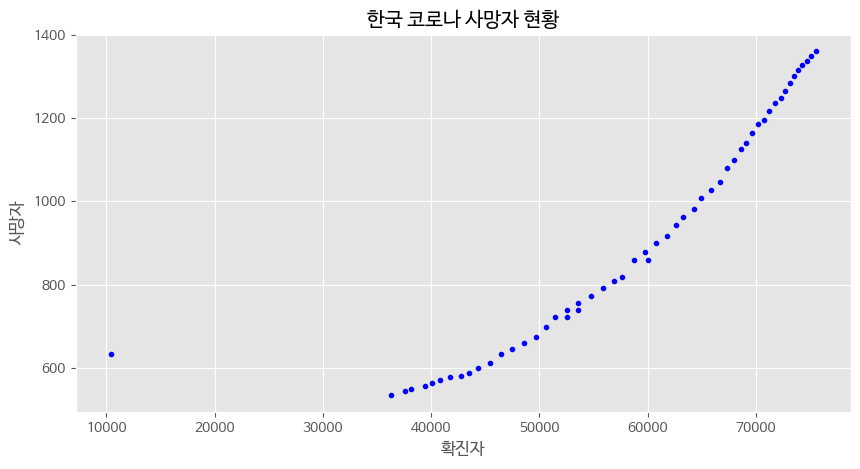

In [11]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')                                 #print(plt.style.available)
plt.figure(figsize=(10,5),dpi=100)                      #사이즈 지정 후 타이틀 설정
plt.title('한국 코로나 사망자 현황')    
plt.xlabel('확진자')                                             
plt.ylabel('사망자')                                             
plt.plot(df['defCnt'],df['deathCnt'],'b.')
plt.show()                                              

In [12]:
#이상치 제거

database=df.values                      #데이터 프레임의 원소들을 numpy 배열(ndarray)로 변환
x=database[:,1]
y=database[:,2]

for i in range(len(x)-1):
  if x[i]>x[i+1]:
    print(i)

10
26


In [13]:
df.iloc[9:28,:]

,stdDay,defCnt,deathCnt
9,2020년 12월 15일 00시,44364.0,600.0
10,2020년 12월 16일 00시,45442.0,612.0
11,2020년 12월 17일 00시,10423.0,634.0
12,2020년 12월 17일 00시,46453.0,634.0
13,2020년 12월 18일 00시,47515.0,645.0
14,2020년 12월 19일 00시,48570.0,659.0
15,2020년 12월 20일 00시,49665.0,674.0
16,2020년 12월 21일 00시,50591.0,698.0
17,2020년 12월 22일 00시,51460.0,722.0
18,2020년 12월 23일 00시,52550.0,722.0


In [14]:
df=df.drop([11,26])
df=df.reset_index(drop=True)      

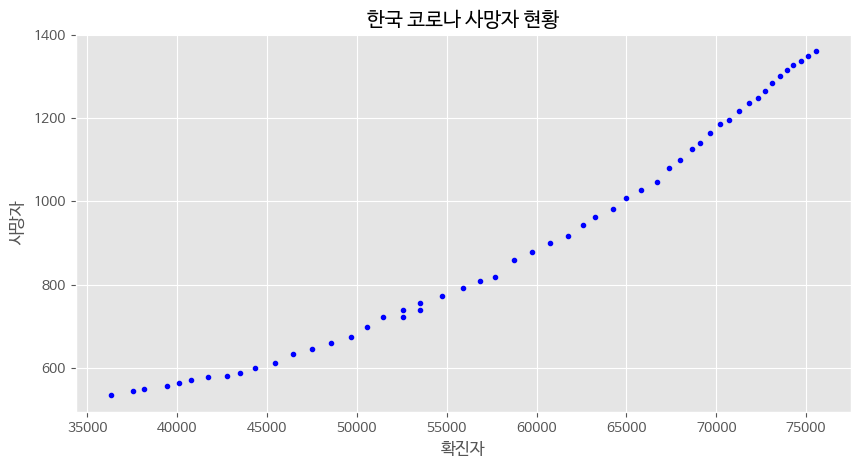

In [15]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(10,5),dpi=100)                      #사이즈 지정 후 타이틀 설정
plt.title('한국 코로나 사망자 현황')    
plt.xlabel('확진자')                                             
plt.ylabel('사망자')                                             
plt.plot(df['defCnt'],df['deathCnt'],'b.')
plt.show()                                              

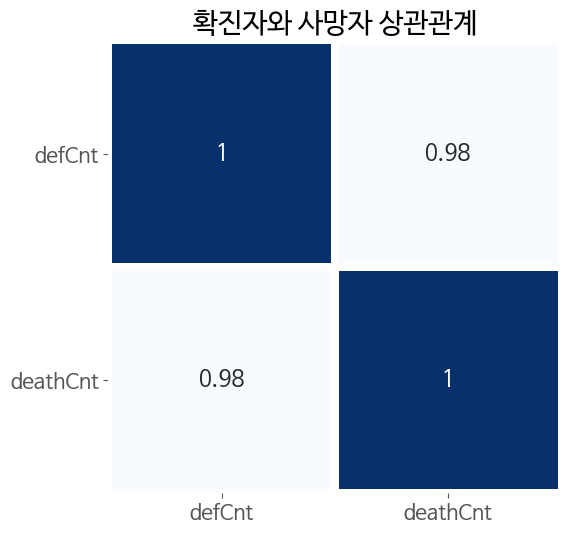

In [16]:
import seaborn as sns

plt.figure(figsize=(10,6),dpi=100)
plt.title('확진자와 사망자 상관관계',size=20)

sns.heatmap(df.corr(),           #DataFrame의 상관관계
            cbar=False,          #colorbal 유무
            cmap='Blues',        #colormap 종류
            square = True,       #정사각형 유무
            linewidths=5,        #각 셀을 나눌 선의 두께
            linecolor='white',   #각 셀을 나눌 선의 색
            annot=True,annot_kws = {"size" : 16}) #셀 위에 숫자 표현, 사이즈

plt.xticks(size=15)              # x축 자료 사이즈
plt.yticks(rotation=0,size=15)   # y축 자료 사이즈 및 회전
plt.show()


###[3] 단순 선형 회귀 모델[1]

Epoch 1/300
2/2 - 1s - loss: 2093348190814794061709312.0000 - accuracy: 0.0000e+00 - val_loss: inf - val_accuracy: 0.0000e+00
Epoch 2/300
2/2 - 0s - loss: inf - accuracy: 0.0000e+00 - val_loss: inf - val_accuracy: 0.0000e+00
Epoch 3/300
2/2 - 0s - loss: inf - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/300
2/2 - 0s - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/300
2/2 - 0s - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/300
2/2 - 0s - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/300
2/2 - 0s - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 8/300
2/2 - 0s - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 9/300
2/2 - 0s - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 10/300
2/2 - 0s - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_acc

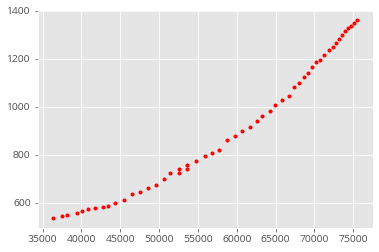

In [17]:
import numpy as np                                    #넘파이 모듈
import tensorflow as tf
from tensorflow.keras.models import Sequential        #keras.models / layers 모듈 중 Sequential, Dense, optimizers 함수 사용
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

tf.random.set_seed(1)
np.random.seed(1)

model=Sequential()                        

model.add(Dense(1,input_dim=1,activation='linear'))                            # model.add를 통해 레이어를 추가합니다.  (입력노드에 연결될 노드의 개수, 입력노드의 개수, 활성함수 선택) - 선형회귀는 입력, 출력 각 1개씩의 레이어(총2개) 사용
                                         
model.compile(optimizers.SGD(lr=0.01),loss='mse',metrics=['accuracy'])                              # model.compile - 모델학습과정을 설정함. optimizer는 최소하강법을 비용함수는 평균제곱오차(mse)를 사용합니다.
                                                                               # 비용함수를 최소화하는 알고리즘(=optimizer) 중 선형회귀에서 사용하는 경사하강법(SGD)을 지정합니다. learing_rate는 학습률
model.fit(df['defCnt'],df['deathCnt'],batch_size=36,epochs=300,verbose=2,validation_split=0.2)      #epochs는 시행 횟수, batch_size - 한번에 사용해야하는 트레이닝 데이터의 크기를 지정 

   
plt.plot(df['defCnt'],model.predict(df['defCnt']),'b',df['defCnt'],df['deathCnt'],'r.')
plt.show()



###[4]정규화 및 샘플링

In [18]:
max1=df['defCnt'].max()
min1=df['defCnt'].min()
max2=df['deathCnt'].max()
min2=df['deathCnt'].min()

df1=df.iloc[:,1:3]
df1=df1.apply(lambda x : (x-x.min())/(x.max()-x.min()))
df1

min2

536.0

In [19]:
# df1=df[['확진자수','사망자수']]                 #z점수 정규화(표준화) 
# m1=df1['확진자수'].mean()
# s1=df1['확진자수'].std()
# m2=df1['사망자수'].mean()
# s2=df1['사망자수'].std()
# print(m1,s1,m2,s2)

# df1=df1.apply(lambda x : (x-x.mean())/x.std())
# df1

# plt.rcParams['axes.unicode_minus']=False

In [20]:
df2=df1.sample(frac=0.8,replace=False)   #훈련 데이터 샘플링
df3=df1.sample(frac=0.2,replace=False)   #테스트 데이터 샘플링

df2=df2.sort_index(ascending=True).reset_index(drop=True)
df3=df3.sort_index(ascending=True).reset_index(drop=True)             
df2

,defCnt,deathCnt
0,0.046671,0.015777
1,0.079104,0.024272
2,0.096098,0.033981
3,0.137896,0.050971
4,0.164179,0.053398
5,0.232463,0.092233
6,0.312282,0.149272
7,0.340223,0.167476
8,0.413841,0.225728
9,0.413841,0.246359


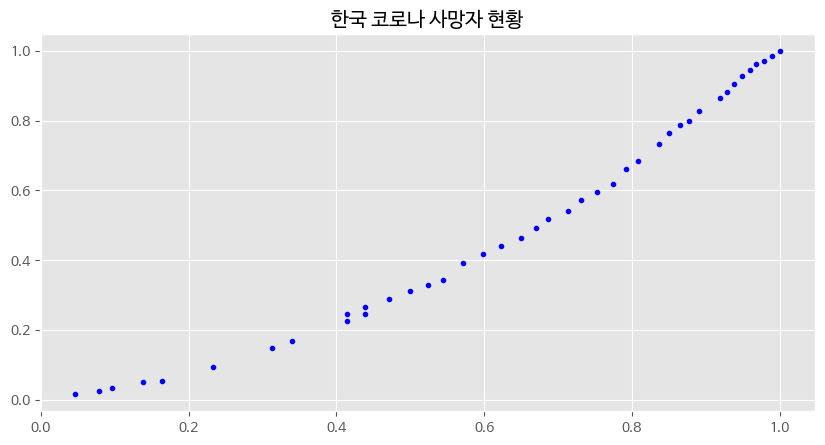

In [21]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(10,5),dpi=100)
plt.title('한국 코로나 사망자 현황')                      #사이즈 지정 후 타이틀 설정
plt.plot(df2['defCnt'],df2['deathCnt'],'b.')
plt.show()                                             #데이터의 잘못된 점을 수정해야하므로 

In [22]:
import numpy as np                                    #넘파이 모듈
import tensorflow as tf
from tensorflow.keras.models import Sequential        #keras.models / layers 모듈 중 Sequential, Dense, optimizers 메소드 사용
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

tf.random.set_seed(3)
np.random.seed(3)

model=Sequential()                        

model.add(Dense(1,input_dim=1,activation='linear'))    # model.add를 통해 레이어를 추가합니다.  (입력노드에 연결될 노드의 개수, 입력노드의 개수, 활성함수 선택) - 선형회귀는 입력, 출력 각 1개씩의 레이어(총2개) 사용
                                         
model.compile(optimizers.SGD(lr=0.1),loss='mse',metrics=['accuracy'])     # model.compile - 모델학습과정을 설정함. optimizer는 최소하강법을 비용함수는 평균제곱오차(mse)를 사용합니다.
                                                                          # 비용함수를 최소화하는 알고리즘(=optimizer) 중 선형회귀에서 사용하는 경사하강법(SGD)을 지정합니다. learing_rate는 학습률

model.fit(df2['defCnt'],df2['deathCnt'],batch_size=36,epochs=300,verbose=2,validation_split=0.2)      #epochs는 시행 횟수, batch_size - 한번에 사용해야하는 트레이닝 데이터의 크기를 지정 



Epoch 1/300
1/1 - 0s - loss: 1.4966 - accuracy: 0.0000e+00 - val_loss: 3.2417 - val_accuracy: 0.0000e+00
Epoch 2/300
1/1 - 0s - loss: 0.9027 - accuracy: 0.0000e+00 - val_loss: 2.3580 - val_accuracy: 0.0000e+00
Epoch 3/300
1/1 - 0s - loss: 0.5770 - accuracy: 0.0000e+00 - val_loss: 1.7910 - val_accuracy: 0.0000e+00
Epoch 4/300
1/1 - 0s - loss: 0.3978 - accuracy: 0.0000e+00 - val_loss: 1.4184 - val_accuracy: 0.0000e+00
Epoch 5/300
1/1 - 0s - loss: 0.2984 - accuracy: 0.0000e+00 - val_loss: 1.1677 - val_accuracy: 0.0000e+00
Epoch 6/300
1/1 - 0s - loss: 0.2427 - accuracy: 0.0000e+00 - val_loss: 0.9949 - val_accuracy: 0.0000e+00
Epoch 7/300
1/1 - 0s - loss: 0.2108 - accuracy: 0.0000e+00 - val_loss: 0.8733 - val_accuracy: 0.0000e+00
Epoch 8/300
1/1 - 0s - loss: 0.1919 - accuracy: 0.0000e+00 - val_loss: 0.7857 - val_accuracy: 0.0000e+00
Epoch 9/300
1/1 - 0s - loss: 0.1801 - accuracy: 0.0000e+00 - val_loss: 0.7214 - val_accuracy: 0.0000e+00
Epoch 10/300
1/1 - 0s - loss: 0.1722 - accuracy: 0.0000

###[5]모델 예측

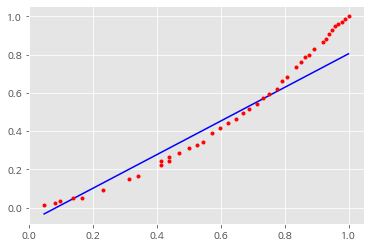

1/1 [==============================] - 0s 15ms/step - loss: 0.0082 - accuracy: 0.0000e+00


 loss : 0.0082, 정확도 무엇? 0.0000


In [23]:
plt.plot(df2['defCnt'],model.predict(df2['defCnt']),'b',df2['defCnt'],df2['deathCnt'],'r.')
plt.show()

score = model.evaluate(df3['defCnt'],df3['deathCnt'])
print("\n\n loss : %.4f, 정확도 무엇? %.4f" %(score[0],score[1]))

In [24]:
a=(model.predict(df3['defCnt'])*(max2-min2)+min2)
b=df3['deathCnt']*(max2-min2)+min2
c=[]
d=[]

for i in range(10):
  print("\n 예측값 : %.4f, 실제값 : %.4f"%(a[i],b[i]))           
  c.append(a[i])
  d.append(b[i])


 예측값 : 662.3978, 실제값 : 634.0000

 예측값 : 774.8417, 실제값 : 722.0000

 예측값 : 944.8632, 실제값 : 917.0000

 예측값 : 972.0659, 실제값 : 962.0000

 예측값 : 990.8773, 실제값 : 981.0000

 예측값 : 1019.5369, 실제값 : 1027.0000

 예측값 : 1047.9384, 실제값 : 1081.0000

 예측값 : 1072.0243, 실제값 : 1125.0000

 예측값 : 1100.5732, 실제값 : 1185.0000

 예측값 : 1168.9213, 실제값 : 1316.0000


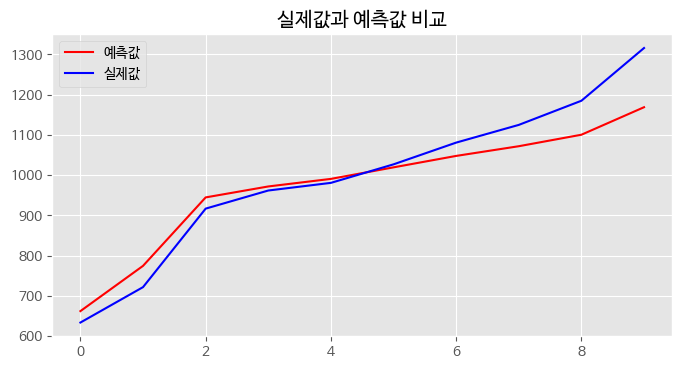

In [25]:
plt.figure(figsize=(8,4),dpi=100)
plt.title("실제값과 예측값 비교")
plt.plot(c,'r',label="예측값")
plt.plot(d,'b',label="실제값")
plt.legend()
plt.show()